## Excersises

1.1
>a) No because there's no analysis, just dividing.
 <br>b) No dividing isn't data mining.
 <br>c) No it's just summing all sales.
 <br>d) No that's just a simple sorting of data.
 <br>e) No because it's a simple mathematical equation for fair dice.
 <br>f) Yes because it's predicting an outcome based on previous data.
 <br>g) Yes because you're comparing against data of known good hearts.
 <br>h) Yes because you're comparing a stream of data against a known normal.
 <br>i) Yes because you're extracting meaningful data from noise.


---


2.2
>a) Binary, qualitative (nominal)
 <br>b) Continuous, quantitative (ratio)
 <br>c) Discrete, qualitative (nominal)
 <br>d) Continuous, quantitative (ratio)
 <br>e) Discrete, qualitative (ordinal)
 <br>f) Continuous, qualitative (interval)
 <br>g) Discrete, quantitative (ratio)
 <br>h) Discrete, qualitative (ordinal)
 <br>i) Discrete, qualitative (ordinal)
 <br>j) Discrete, qualitative (oridnal)
 <br>k) Continuous, quantitative (interval)
 <br>l) Continuous, quantitative (ratio)
 <br>m) Discrete, qualitative (nominal)

---


2.7
> Daily Temperature because the weather is continuous, warming slightly or cooling slightly it is more correlated to the previous temperature opposed to daily rainfall which varies wildy as rain one day is not necessarily related to rain the previous. A month in summer will stay consistenly warm while it may rain 2 days in a row and then be dry for the rest of the month.


---


2.15
>Method A gets elements proportional to the amount in each group, like The House of Representatives where as the Method B disregards the size of each group like The Senate.


---


2.16
>a) If a term is found in all documents, you have *tf*<sub>ij</sub> * Log(m/*df*<sub>i</sub> where m/*df*<sub>i</sub> is 1 and log(1) = 0 so the value goes to zero if the word is frequent and in every document.<br>A term not in every document is just proportional to it's frequency over number of documents it's in.
<br>b) To find terms that signify the meaning of a particular paper, i.e. spaceship appearing many times in a paper about NASA accurately describes the context of the paper, whereas the word 'the' appears in almost every paper and it's significance to anything is almost always negligible.


---


2.17
>a) Corresponding Interval: (a<sup>2</sup>, b<sup>2</sup>)
<br>b) y = x<sup>2</sup>


---


2.18
>a) Hamming: 3 bits are different<br>Jaccard: 2(10-5) = 0.4
<br>b)Hamming, is like the Simple Matching Coefficient because the numerator is the same as the Hamming Distance.<br>Jaccard is similar to the Cosine Measure because both ignore zero matches.
<br>c)We would want to use the Jaccard because it measures the similarity between two values whereas Hamming measures the difference between two values and cares about which parts are different.
<br>d)We want to use the Hamming distance because we're trying to find the amount different in two very similar gene strings. Care more about difference than similarity in this case.


---


2.19
>a) Cosine: 1, Correlation: 0/0, Euclidean = 2
<br>b) Cosine: 0 Correlation: -1 Euclidean: 2 Jaccard: 0
<br>c) Cosine: 0 Correlation: 0 Euclidean: 2
<br>d) Cosine: 0.75 Correlation: 0.25 Jaccard: 0.6
<br>e) Cosine: 0 Correlation: 0

# Practicum


## Problem 1

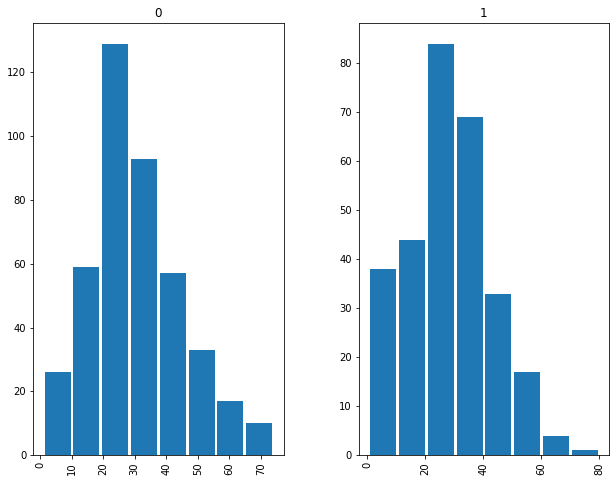

In [16]:
import pandas as pd
titanic_df = pd.read_csv("./Data_Sets/titanic/train.csv")

age_df = titanic_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by="Survived")
titanic_df['AgeSpread'] = pd.cut(titanic_df['Age'], 15)
#age_spread_survival = df[['AgeSpread', 'Survived']].groupby(['AgeSpread'], as_index = False).mean().sort_values(by='AgeSpread', ascending=True)
#age_spread_survival.hist(column = 'AgeSpread')
age_hist = titanic_df.hist(column='Age',by = "Survived",bins=8,grid=False,figsize=(10,8),rwidth = .9)
               

## Problem 2

In [18]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

#Names Attributes
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
auto_df = pd.read_csv("./Data_Sets/auto_mpg/auto-mpg.data", delim_whitespace=True, names=column_names)
auto_df.head()

#Finds missing HP's and replaces with numpy NaN
missing_hp = auto_df[auto_df.horsepower == '?'].index
auto_df.loc[missing_hp]
auto_df.loc[missing_hp, 'horsepower'] = np.nan
auto_df.horsepower  = auto_df.horsepower.apply(pd.to_numeric)

print("----Default Summary Statistics----\n")
print(auto_df.describe())
print("\nDefault Variance: " + str(auto_df.loc[:,'horsepower'].var()))
#Make 3 seperate imputers
mean_imputer =   SimpleImputer(missing_values = np.nan, strategy = 'mean')
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
mode_imputer =   SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# Impute with mean and print summary
imputed_mean_df = auto_df.copy()
imputed_mean_df['horsepower'] = (mean_imputer.fit_transform(auto_df[['horsepower']])).ravel()


print("\n----Mean Replaced Summary Statistics----\n")
print(imputed_mean_df.describe())
print("\nMean Replaced Variance: " + str(imputed_mean_df.loc[:,'horsepower'].var()))

# Impute with median and print summary
imputed_median_df = auto_df.copy()
imputed_median_df['horsepower'] = (median_imputer.fit_transform(auto_df[['horsepower']])).ravel()


print("\n----Mean Replaced Summary Statistics----\n")
print(imputed_median_df.describe())
print("\nMedian Replaced Variance: " + str(imputed_median_df.loc[:,'horsepower'].var()))

# Impute with mode and print summary
imputed_mode_df = auto_df.copy()
imputed_mode_df['horsepower'] = (mode_imputer.fit_transform(auto_df[['horsepower']])).ravel()

print("\n----Mean Replaced Summary Statistics----\n")
print(imputed_mode_df.describe())
print("\nMode Replaced Variance: " + str(imputed_mode_df.loc[:,'horsepower'].var()))


----Default Summary Statistics----

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.00

The mean imputation resulted in the least variance which makes sense because variance is the distance from the mean, and the distance of the mean from itself is zero.<br>
A different method of imputing that could be more accurate is Mulitple Imputation which better imputes when data is randomly missing as is our case with horsepower.<br>
Multiple Imputation means imputed values are drawn multiple times from a distribution rather than just once, at the end each of the produced data sets is analyzed and then they are consolidated into one result by getting the mean of all the imputed values.


## Problem 3

In [43]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris_df = pd.read_csv("./Data_Sets/iris/iris.data", names = ['sepal length', 'sepal width', 'petal length', 'petal width','species'])

feats = ['sepal length', 'sepal width', 'petal length', 'petal width']

#Seperate the features
x = iris_df.loc[:, feats].values

#Seperate Target
y = iris_df.loc[:,['species']].values

# Standardizing the features

x = StandardScaler().fit_transform(x)

iris_pca = PCA(n_components=2)
princ_components = iris_pca.fit_transform(x)

princ_df = pd.DataFrame(data = princ_components
             , columns = ['Principal Component 1', 'Principal Component 2'])

finalDf = pd.concat([princ_df, iris_df[['species']]], axis = 1)

print("PCA Obtained Variance Information: " + str(iris_pca.explained_variance_ratio_))

print("Original Variance Information: " + str(iris_df.var()))

PCA Obtained Variance Information: [0.72770452 0.23030523]
Original Variance Information: sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64


We see that the first principle component has 72.770 percent of the variance information and the second principle component has 23.031 percent of the variance info for a total of 95.801 percent of the total variance.<br>


## Problem 4